<a href="https://colab.research.google.com/github/Ishwaryakeerthivasan/Indian_dev_analysis/blob/main/Indian_Development_Projects_Analysis%5B2007_2014%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import geopandas as gpd
import pandas as pd
import folium

# Assuming you have your data loaded into a Pandas DataFrame called 'df'
df = pd.read_csv("/content/ind_aid_global_locations_releaseV1.csv", encoding="latin-1")
# 'geometry' column should contain geometry information (points/coordinates)

# Create a GeoDataFrame from the Pandas DataFrame
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df.longitude, df.latitude),
                       crs="EPSG:4326")  # Assuming your data uses WGS 84

# Create a Folium map with OpenStreetMap (OSM) "Mapnik" tileset as the base layer
m = folium.Map(location=[20, 0], zoom_start=2, control_scale=True)

# Add OpenStreetMap "Mapnik" tileset as a layer (includes satellite imagery)
folium.TileLayer(
    tiles="https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
    attr="OpenStreetMap",
    name="Satellite",
    subdomains=["a", "b", "c"],
).add_to(m)

# Add markers for each project location
for idx, row in gdf.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['project_title']).add_to(m)

# Add a LayerControl to switch between map tile layers
folium.LayerControl().add_to(m)

# Display the map
m.save('dynamic_satellite_map.html')  # Save the map to an HTML file

In [ ]:
import matplotlib.pyplot as plt

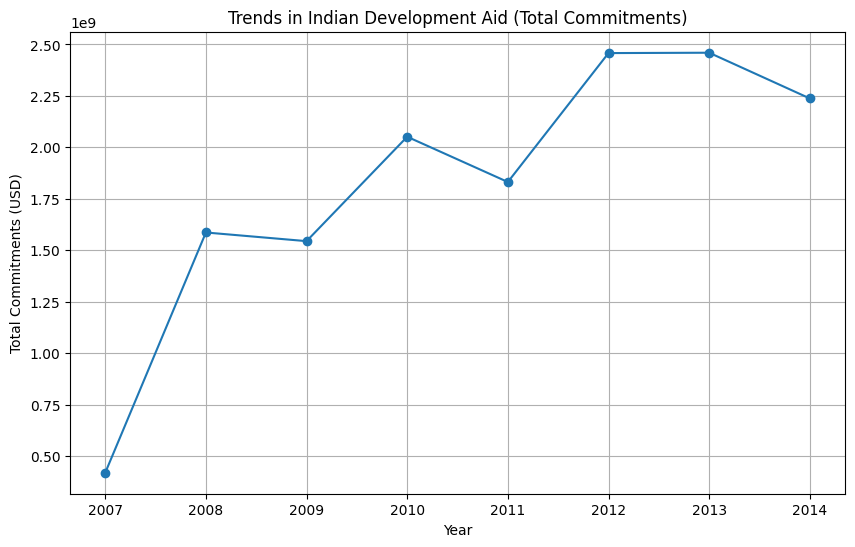

<Figure size 1200x800 with 0 Axes>

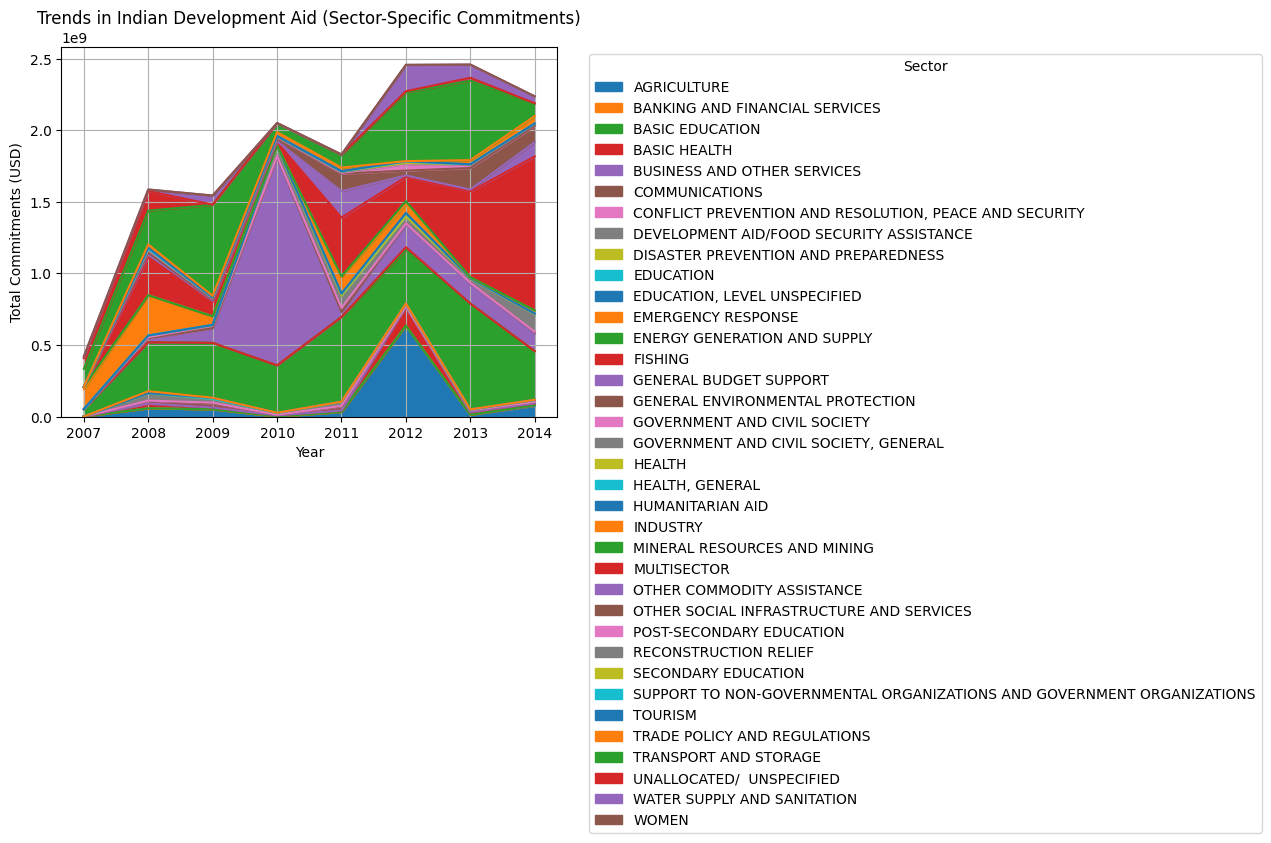

In [ ]:
# Group the data by year and calculate the total commitments for each year
yearly_commitments = df.groupby('year')['usd_commitment_con'].sum()

# Create a line plot to visualize the trend in total commitments over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_commitments.index, yearly_commitments.values, marker='o', linestyle='-')
plt.title('Trends in Indian Development Aid (Total Commitments)')
plt.xlabel('Year')
plt.ylabel('Total Commitments (USD)')
plt.grid(True)
plt.show()

# Assuming you have a column 'crs_sector_name' for the sector names and 'usd_commitment_con' for sector-specific commitments

# Group the data by year and sector and calculate the total commitments for each sector
sector_yearly_commitments = df.groupby(['year', 'crs_sector_name'])['usd_commitment_con'].sum()

# Pivot the data to create a DataFrame suitable for plotting
sector_yearly_commitments = sector_yearly_commitments.reset_index().pivot(
    index='year', columns='crs_sector_name', values='usd_commitment_con'
)

# Create a stacked area plot to visualize sector-specific commitment trends over time
plt.figure(figsize=(12, 8))
sector_yearly_commitments.plot(kind='area', stacked=True)
plt.title('Trends in Indian Development Aid (Sector-Specific Commitments)')
plt.xlabel('Year')
plt.ylabel('Total Commitments (USD)')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Define a dictionary to map CRS sector codes to sector names
sector_mapping = {
    '111': 'Education',
    '112': 'Basic Education',
    '121': 'Health',
    '122': 'Basic Health',
    '230': 'Water Supply and Sanitation',
    '311': 'Agriculture',
    '312': 'Forestry',
    '313': 'Fishing',
    '400': 'Other Social Infrastructure and Services',
    # Add more mappings as needed
}

# Create a new column 'sector_name' by mapping CRS sector codes to sector names
df['sector_name'] = df['crs_sector'].astype(str).map(sector_mapping)

# Now, you can analyze the dataset based on sectors
# For example, to count the number of projects in each sector:
sector_counts = df['sector_name'].value_counts()

# Print the results
print(sector_counts)


Water Supply and Sanitation    293
Agriculture                    165
Basic Health                   110
Education                       45
Basic Education                 38
Health                          32
Fishing                          2
Name: sector_name, dtype: int64


In [ ]:
df.head()

,project_location_id,aiddata_project_id,recipientname,iso3c,year,name_0,geoname_id,place_name,project_locas,project_title,...,flow_class,crs_sector,crs_sector_name,agencyname.1,project_count,usd_commitment_con,usd_commitment_pt_con,usd_disbursment_con,usd_disbursment_pt_con,sector_name
0,906001106261_1,9.060010e+11,Armenia,ARM,2011,Armenia,11071651,Yerevan State University,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
1,906001106261_2,9.060010e+11,Belarus,BLR,2011,Belarus,11072145,Belarus Hi-Tech Park,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
2,906001106261_3,9.060010e+11,Turkmenistan,TKM,2011,Turkmenistan,11072146,Turkmen State University named after Magtymguly,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
3,906001106263_1,9.060010e+11,Central African Republic,CAF,2012,Central African Republic,2389853,Bangui,1,"IT Centre, Central African Republic",...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,192957.0,192957.0,NaN,NaN,NaN
4,906001106265_1,9.060010e+11,Niger,NER,2014,Niger,2440476,Niger,2,Exim Bank Organises Product Development Worksh...,...,OOF,140,WATER SUPPLY AND SANITATION,India EXIM Bank,1,12500000.0,25000000.0,NaN,NaN,NaN


In [ ]:
df.rename(columns={'agencyname.1': 'agencyname_1'})

,project_location_id,aiddata_project_id,recipientname,iso3c,year,name_0,geoname_id,place_name,project_locas,project_title,...,flow_class,crs_sector,crs_sector_name,agencyname_1,project_count,usd_commitment_con,usd_commitment_pt_con,usd_disbursment_con,usd_disbursment_pt_con,sector_name
0,906001106261_1,9.060010e+11,Armenia,ARM,2011,Armenia,11071651,Yerevan State University,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
1,906001106261_2,9.060010e+11,Belarus,BLR,2011,Belarus,11072145,Belarus Hi-Tech Park,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
2,906001106261_3,9.060010e+11,Turkmenistan,TKM,2011,Turkmenistan,11072146,Turkmen State University named after Magtymguly,3,IT Centres,...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,187921.0,563764.0,NaN,NaN,NaN
3,906001106263_1,9.060010e+11,Central African Republic,CAF,2012,Central African Republic,2389853,Bangui,1,"IT Centre, Central African Republic",...,ODA,220,COMMUNICATIONS,Indian Ministry of External Affairs,1,192957.0,192957.0,NaN,NaN,NaN
4,906001106265_1,9.060010e+11,Niger,NER,2014,Niger,2440476,Niger,2,Exim Bank Organises Product Development Worksh...,...,OOF,140,WATER SUPPLY AND SANITATION,India EXIM Bank,1,12500000.0,25000000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,906001108824_154,9.060010e+11,Samoa,WSM,2009,Samoa,4034894,Samoa,158,TECHNICAL COOPERATION -- Training of foreign n...,...,ODA,150,GOVERNMENT AND CIVIL SOCIETY,Indian Ministry of External Affairs,1,112857.0,17831452.0,NaN,NaN,NaN
4307,906001108824_155,9.060010e+11,Yemen,YEM,2009,Yemen,69543,Yemen,158,TECHNICAL COOPERATION -- Training of foreign n...,...,ODA,150,GOVERNMENT AND CIVIL SOCIETY,Indian Ministry of External Affairs,1,112857.0,17831452.0,NaN,NaN,NaN
4308,906001108824_156,9.060010e+11,South Africa,ZAF,2009,South Africa,953987,South Africa,158,TECHNICAL COOPERATION -- Training of foreign n...,...,ODA,150,GOVERNMENT AND CIVIL SOCIETY,Indian Ministry of External Affairs,1,112857.0,17831452.0,NaN,NaN,NaN
4309,906001108824_157,9.060010e+11,Zambia,ZMB,2009,Zambia,895949,Zambia,158,TECHNICAL COOPERATION -- Training of foreign n...,...,ODA,150,GOVERNMENT AND CIVIL SOCIETY,Indian Ministry of External Affairs,1,112857.0,17831452.0,NaN,NaN,NaN
